In [98]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline


In [99]:
df = pd.read_csv('musk_new.csv')

In [100]:
df

,Unnamed: 0,Text,Date_New
0,0,Woke v Woke https://t.co/hmhC5eelik,2022-12-08
1,1,@EthanBitcoin @dergigi lol,2022-12-08
2,2,@EddieZipperer https://t.co/92voOIH5d8,2022-12-08
3,3,RT @teslaownersSV: Tesla Semi is super quiet w...,2022-12-08
4,4,RT @SpaceX: Teams completed additional vehicle...,2022-12-07
...,...,...,...
908,908,@BillyM2k Totally agree!,2022-11-09
909,909,RT @robinw: https://t.co/05QY6u4FSD,2022-11-09
910,910,"@TOIPlus Nope, I was alway 🥜 !",2022-11-09
911,911,@ZubyMusic Yeah,2022-11-09


### Cleaning the data for Sentimental Analysis 

In [101]:
df.drop('Unnamed: 0', inplace=True, axis=1)

## NLKT

In [102]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [103]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /Users/saori/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/saori/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/saori/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to /Users/saori/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      913 non-null    object
 1   Date_New  913 non-null    object
dtypes: object(2)
memory usage: 14.4+ KB


In [105]:
df['length'] = list(map(lambda x: len(str(x).split()), df['Text']))

In [106]:
df.head()

,Text,Date_New,length
0,Woke v Woke https://t.co/hmhC5eelik,2022-12-08,4
1,@EthanBitcoin @dergigi lol,2022-12-08,3
2,@EddieZipperer https://t.co/92voOIH5d8,2022-12-08,2
3,RT @teslaownersSV: Tesla Semi is super quiet w...,2022-12-08,24
4,RT @SpaceX: Teams completed additional vehicle...,2022-12-07,21


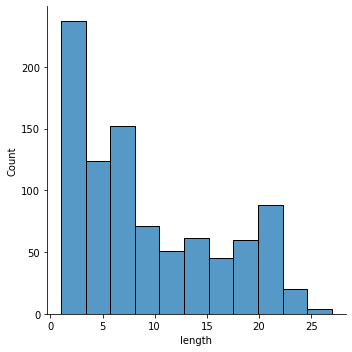

In [107]:
sns.displot(x=df['length'])

In [108]:
df['length'].describe()

count    913.000000
mean       9.360350
std        6.753041
min        1.000000
25%        3.000000
50%        7.000000
75%       15.000000
max       27.000000
Name: length, dtype: float64

In [109]:
#meadian of tweets length
m = df['length'].median()
m

7.0

In [110]:
tweets = ['']
corpus=[]
for tweet in df['Text']:
    tweets.append(tweet)
    corpus.append(nltk.sent_tokenize(tweet))

In [111]:
corpus

[['Woke v Woke https://t.co/hmhC5eelik'],
 ['@EthanBitcoin @dergigi lol'],
 ['@EddieZipperer https://t.co/92voOIH5d8'],
 ['RT @teslaownersSV: Tesla Semi is super quiet while pulling the float.',
  'Pretty insane to see this as the future.',
  'The exhaust and engine aren’…'],
 ['RT @SpaceX: Teams completed additional vehicle inspections and reviews; rocket and payload are looking good for launch of the\xa0@ispace_inc\xa0H…'],
 ['@ChrisJBakke 🤣🤣'],
 ['@jack Most important data was hidden (from you too) and some may have been deleted, but everything we find will be released'],
 ['@BoeingAirplanes One of the best aircraft ever'],
 ['@karpathy 🔥🤣'],
 ['Oh, you know, keeping busy … https://t.co/jgGYovK6jL'],
 ['@ESYudkowsky To be called AGI, it needs to invent amazing things or discover deeper physics – many humans have done… https://t.co/Xc3DLEws1l'],
 ['@charliekirk11 Small world …'],
 ['Oh, what a tangled web they weave, when first they practice to …'],
 ['@EricRWeinstein @bariweiss @mta

In [112]:
## flatten the list
corpus=[sent for sublist in corpus for sent in sublist]

In [113]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'(@[a-z0-9+._-]+)'," ", corpus[i]) # Replace @users by ' '
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()

### Tokenizing the corpus


In [114]:
wordfreq = {}
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [115]:
len(list(wordfreq.keys()))

2331

In [116]:
wordfreq.keys()

dict_keys(['woke', 'v', 'https', 't', 'co', 'hmhc', 'eelik', 'lol', 'vooih', 'd', 'rt', 'tesla', 'semi', 'is', 'super', 'quiet', 'while', 'pulling', 'the', 'float', 'pretty', 'insane', 'to', 'see', 'this', 'as', 'future', 'exhaust', 'and', 'engine', 'aren', 'teams', 'completed', 'additional', 'vehicle', 'inspections', 'reviews', 'rocket', 'payload', 'are', 'looking', 'good', 'for', 'launch', 'of', 'h', 'most', 'important', 'data', 'was', 'hidden', 'from', 'you', 'too', 'some', 'may', 'have', 'been', 'deleted', 'but', 'everything', 'we', 'find', 'will', 'be', 'released', 'one', 'best', 'aircraft', 'ever', 'oh', 'know', 'keeping', 'busy', 'jggyovk', 'jl', 'called', 'agi', 'it', 'needs', 'invent', 'amazing', 'things', 'or', 'discover', 'deeper', 'physics', 'many', 'humans', 'done', 'xc', 'dlews', 'l', 'small', 'world', 'what', 'a', 'tangled', 'web', 'they', 'weave', 'when', 'first', 'practice', 'only', 'discovered', 'on', 'sunday', 'so', 'city', 'sf', 'attacks', 'companies', 'providing', 

In [117]:
type(wordfreq)

dict

In [132]:
#remove words with lenght less than 2, but keeping 'ok'
wordfreq = dict((key,wordfreq[key]) for key in w if len(key)>2 or key== 'ok')

NameError: name 'w' is not defined

In [119]:
type(wordfreq)

dict

In [120]:
len(list(wordfreq.keys()))

2331

In [121]:
#Reduce the corpus by removung stopwords

from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))

In [122]:
#Cleaning stop words (i.e : you vs you're)
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [123]:
#drop stop words from bag
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [124]:
corpus

[(3, 'woke'),
 (8, 'v'),
 (198, 'https'),
 (197, 'co'),
 (1, 'hmhc'),
 (1, 'eelik'),
 (8, 'lol'),
 (1, 'vooih'),
 (32, 'rt'),
 (22, 'tesla'),
 (4, 'semi'),
 (9, 'super'),
 (2, 'quiet'),
 (1, 'pulling'),
 (1, 'float'),
 (5, 'pretty'),
 (3, 'insane'),
 (11, 'see'),
 (6, 'future'),
 (1, 'exhaust'),
 (1, 'engine'),
 (1, 'teams'),
 (2, 'completed'),
 (1, 'additional'),
 (2, 'vehicle'),
 (1, 'inspections'),
 (1, 'reviews'),
 (2, 'rocket'),
 (1, 'payload'),
 (6, 'looking'),
 (25, 'good'),
 (3, 'launch'),
 (3, 'h'),
 (7, 'important'),
 (2, 'data'),
 (2, 'hidden'),
 (7, 'may'),
 (1, 'deleted'),
 (4, 'everything'),
 (3, 'find'),
 (1, 'released'),
 (11, 'one'),
 (10, 'best'),
 (2, 'aircraft'),
 (3, 'ever'),
 (8, 'oh'),
 (11, 'know'),
 (1, 'keeping'),
 (1, 'busy'),
 (1, 'jggyovk'),
 (1, 'jl'),
 (1, 'called'),
 (1, 'agi'),
 (8, 'needs'),
 (1, 'invent'),
 (4, 'amazing'),
 (8, 'things'),
 (1, 'discover'),
 (1, 'deeper'),
 (1, 'physics'),
 (16, 'many'),
 (4, 'humans'),
 (5, 'done'),
 (2, 'xc'),
 (1, '

In [125]:
corpus.sort(reverse = True)
corpus

[(198, 'https'),
 (197, 'co'),
 (126, 'twitter'),
 (33, 'amp'),
 (32, 'rt'),
 (28, 'people'),
 (25, 'good'),
 (22, 'tesla'),
 (21, 'time'),
 (21, 'like'),
 (20, 'speech'),
 (18, 'great'),
 (17, 'week'),
 (17, 'tweets'),
 (16, 'many'),
 (15, 'actually'),
 (14, 'world'),
 (13, 'true'),
 (13, 'sbf'),
 (13, 'far'),
 (13, 'exactly'),
 (12, 'yes'),
 (12, 'working'),
 (12, 'verified'),
 (12, 'real'),
 (12, 'media'),
 (11, 'would'),
 (11, 'work'),
 (11, 'see'),
 (11, 'right'),
 (11, 'one'),
 (11, 'next'),
 (11, 'much'),
 (11, 'know'),
 (11, 'free'),
 (11, 'apple'),
 (11, 'accounts'),
 (10, 'tweet'),
 (10, 'think'),
 (10, 'team'),
 (10, 'false'),
 (10, 'correct'),
 (10, 'best'),
 (10, 'agreed'),
 (9, 'super'),
 (9, 'still'),
 (9, 'spam'),
 (9, 'said'),
 (9, 'probably'),
 (9, 'new'),
 (9, 'long'),
 (9, 'hate'),
 (9, 'even'),
 (9, 'blue'),
 (9, 'accurate'),
 (8, 'well'),
 (8, 'v'),
 (8, 'trump'),
 (8, 'things'),
 (8, 'take'),
 (8, 'result'),
 (8, 'oh'),
 (8, 'needs'),
 (8, 'maybe'),
 (8, 'make'),

In [44]:
len(corpus)

2205

### Stemming

In [126]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lem = WordNetLemmatizer()

corpus = [(lem.lemmatize(word[1]),word[0]) for word in corpus]
corpus

[nltk_data] Downloading package omw-1.4 to /Users/saori/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('http', 198),
 ('co', 197),
 ('twitter', 126),
 ('amp', 33),
 ('rt', 32),
 ('people', 28),
 ('good', 25),
 ('tesla', 22),
 ('time', 21),
 ('like', 21),
 ('speech', 20),
 ('great', 18),
 ('week', 17),
 ('tweet', 17),
 ('many', 16),
 ('actually', 15),
 ('world', 14),
 ('true', 13),
 ('sbf', 13),
 ('far', 13),
 ('exactly', 13),
 ('yes', 12),
 ('working', 12),
 ('verified', 12),
 ('real', 12),
 ('medium', 12),
 ('would', 11),
 ('work', 11),
 ('see', 11),
 ('right', 11),
 ('one', 11),
 ('next', 11),
 ('much', 11),
 ('know', 11),
 ('free', 11),
 ('apple', 11),
 ('account', 11),
 ('tweet', 10),
 ('think', 10),
 ('team', 10),
 ('false', 10),
 ('correct', 10),
 ('best', 10),
 ('agreed', 10),
 ('super', 9),
 ('still', 9),
 ('spam', 9),
 ('said', 9),
 ('probably', 9),
 ('new', 9),
 ('long', 9),
 ('hate', 9),
 ('even', 9),
 ('blue', 9),
 ('accurate', 9),
 ('well', 8),
 ('v', 8),
 ('trump', 8),
 ('thing', 8),
 ('take', 8),
 ('result', 8),
 ('oh', 8),
 ('need', 8),
 ('maybe', 8),
 ('make', 8),
 ('

In [127]:
type(corpus)

list

In [51]:
# Assign the built-in set of STOPWORDS to a variable stopwords, and preview it
stopwords = stop_words
stopwords


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

# WordCloud map! Let's do it

To see the word frequency

In [140]:
import os

from os import path
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS


In [141]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [142]:
stopwords = STOPWORDS
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'co',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'https',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'many',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'other

In [147]:
# Join all the tweets by a space
test = " ".join(df['Text'])

# Preview first 2000 characters to see whether reviews have been joined
test[0:2000]

KeyError: 'Text'

In [145]:
stopwords.update(["http", 'https', "co", "rt", "many", "sbf", 't', 's'])

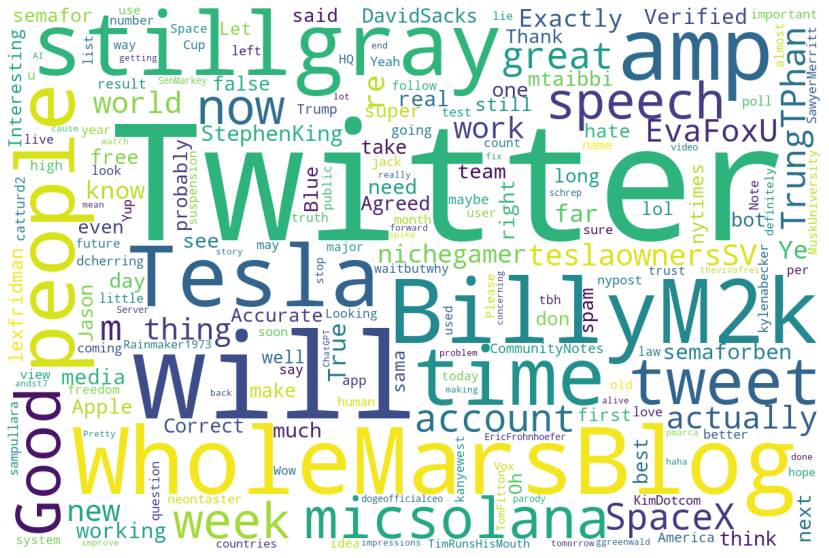

In [146]:
# Generate our wordcloud, but change the background color
wordcloud = WordCloud(
    collocations=False, 
    width = 1200, height = 800, 
    background_color="white", 
    stopwords=stopwords)

wordcloud.generate(test)

# Display the wordcloud, but with update size
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()